<a href="https://colab.research.google.com/github/Razor6ix/Bellaboo/blob/main/Another_Copy_FDS_Project_LearnerNotebook_FullCode_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Foundations for Data Science: FoodHub Data Analysis

**Marks: 60**

In [1]:
!pip install nbconvert

In [2]:
! jupyter nbconvert --to html /content/Another_Copy_FDS_Project_LearnerNotebook_FullCode_.ipynb

[NbConvertApp] WARNING | pattern '/content/Another_Copy_FDS_Project_LearnerNotebook_FullCode_.ipynb' matched no files
This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent 

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [3]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import drive # importing my Google drive into Google Colab

drive.mount ('/content/drive') # mounting my Google drive to access my data

Mounted at /content/drive


### Understanding the structure of the data

In [4]:
# read the data
df = pd.read_csv('/content/drive/MyDrive/foodhub_order.csv')
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [5]:
df.shape

(1898, 9)

#### Observations: The dataset has 1,898 rows and 9 columns.


### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:
- All columns have 1,898 observations with no null or missing values.
- order_id, customer_id, food_preparation_time, and delivery_time, are 'integers'.
- restaurant_name, cuisine_type, day_of_the_week, and rating are classified as 'object' data.
- The cost_of_the_order is a 'float'.



### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [7]:
# Find missing values
missing_values = df.isna().sum()

print(missing_values)

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64


#### Observations: As stated earlier, all columns have 1,898 observations with no null or missing values.


### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
order_id,1898.0,1.477496e+06,548.049724,1476547.00,1477021.25,1477495.50,1.477970e+06,1478444.00
customer_id,1898.0,1.711685e+05,113698.139743,1311.00,77787.75,128600.00,2.705250e+05,405334.00
cost_of_the_order,1898.0,1.649885e+01,7.483812,4.47,12.08,14.14,2.229750e+01,35.41
food_preparation_time,1898.0,2.737197e+01,4.632481,20.00,23.00,27.00,3.100000e+01,35.00
delivery_time,1898.0,2.416175e+01,4.972637,15.00,20.00,25.00,2.800000e+01,33.00


#### Observations:
Once an order is placed, the following are the food preparation times:
- Minimum = 20
- Average = 27.37
- Maximum = 35



### **Question 5:** How many orders are not rated? [1 mark]

In [9]:
# I decided to first see what the percentage of each rating given

# Count the occurrences of each unique value
value_counts = df['rating'].value_counts()

# Calculate the percentage of each value
percentages = (value_counts / value_counts.sum()) * 100

# Display the results
print(percentages)


Not given    38.777661
5            30.979979
4            20.337197
3             9.905163
Name: rating, dtype: float64


In [10]:
df.describe(exclude = 'number').T

,count,unique,top,freq
restaurant_name,1898,178,Shake Shack,219
cuisine_type,1898,14,American,584
day_of_the_week,1898,2,Weekend,1351
rating,1898,4,Not given,736


#### Observations: Out of 1,898 orders, 736 or approximately 38% of all orders placed were not rated.


### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

In [11]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

def histogram_boxplot(feature, figsize=(15, 10), bins="auto"):
    """ Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (15, 10))
    bins: number of bins (default "auto")
    """
    f, (ax_box, ax_hist) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid
        sharex=True,  # The X-axis will be shared among all the subplots
        gridspec_kw={"height_ratios": (.25, .75)},
        figsize=figsize
    )

    # Creating the subplots
    # Boxplot will be created and the mean value of the column will be indicated using some symbol
    sns.boxplot(x=feature, ax=ax_box, showmeans=True, color='red')

    # For histogram
    sns.histplot(x=feature, kde=False, ax=ax_hist, bins=bins)
    ax_hist.axvline(np.mean(feature), color='g', linestyle='--')      # Add mean to the histogram
    ax_hist.axvline(np.median(feature), color='black', linestyle='-') # Add median to the histogram

    plt.show()

# **Observations on Order ID**

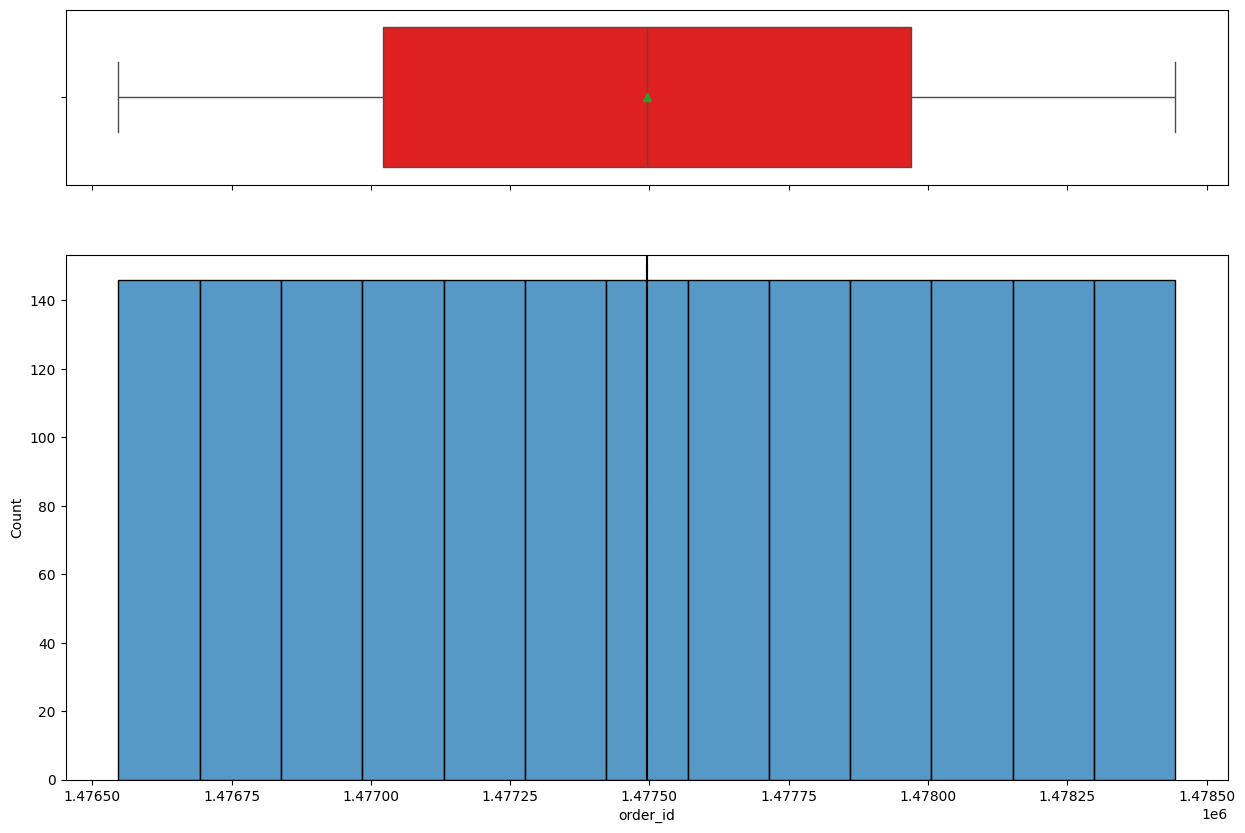

In [12]:
histogram_boxplot(df.order_id)


The boxplot and histogram of the data frame order_id clearly shows this ID is just a unique Identification Number assigned with uniform distribution.

# **Observations on Customer ID**

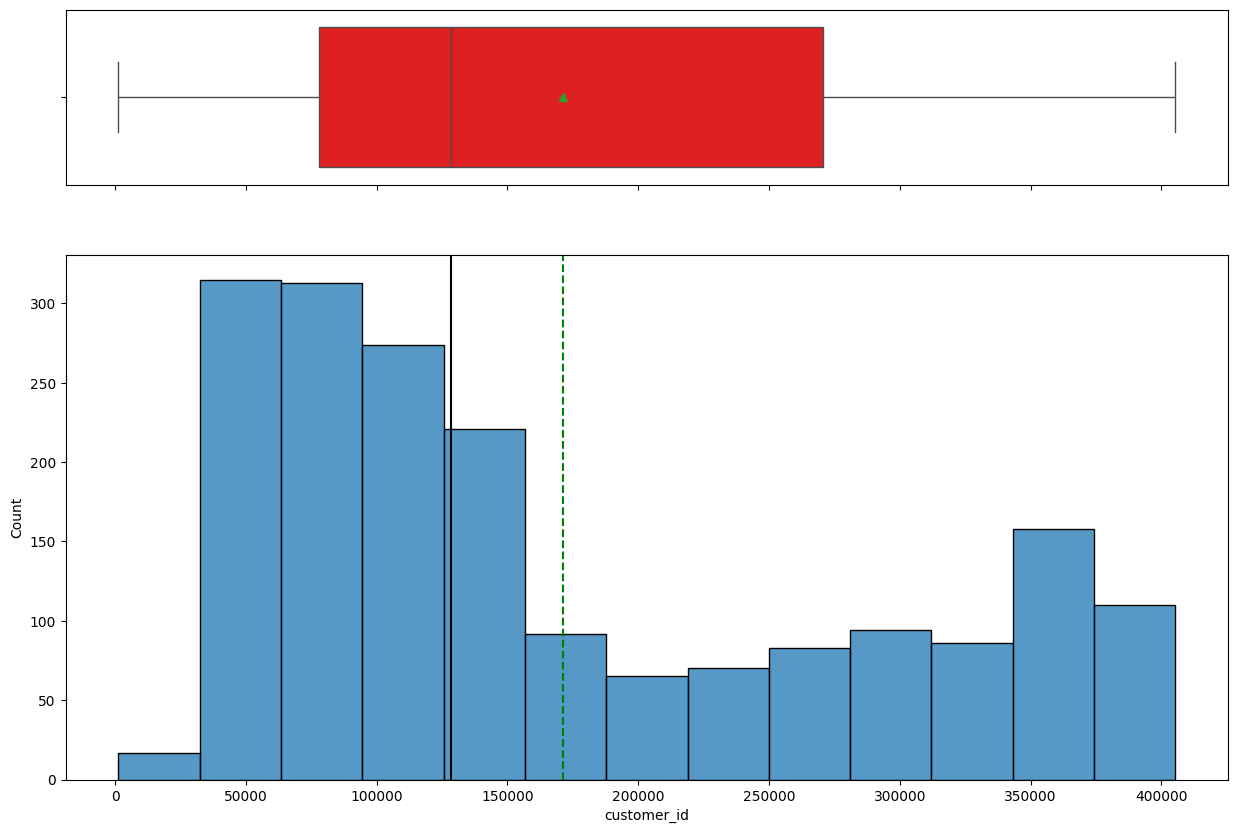

In [13]:
histogram_boxplot(df.customer_id)


The boxplot and histogram of the customer_id is more interesting as it indicates there are certain customers that are repeat customers. This histogram is right skewed indicating that customers with numerically lower customer ID numbers have made more frequent orders. This may be the result of customers simply having the app for more time allowing them to have more time to make food orders, but it does provide an aspect of the data to further explore.


# **Observations of Cost of the Order**

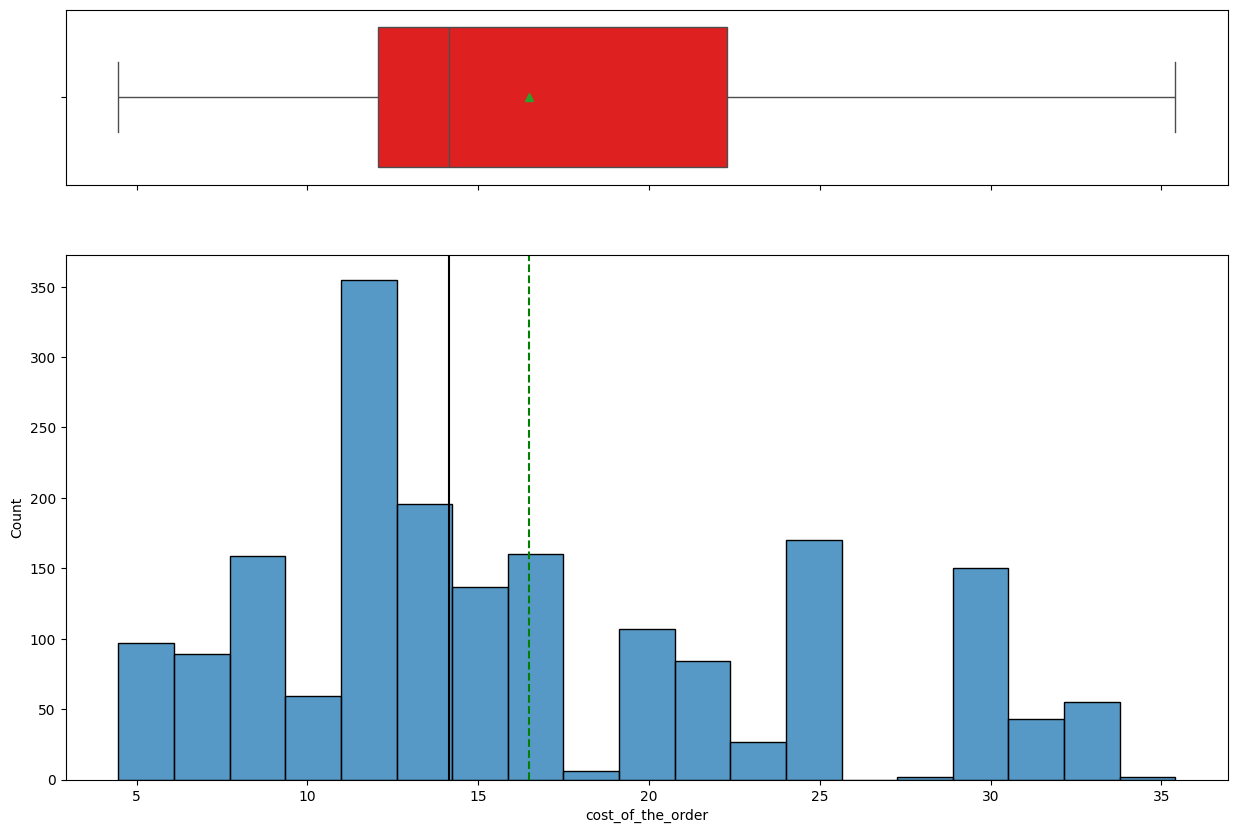

In [14]:
histogram_boxplot(df.cost_of_the_order)


The boxplot and histogram of the cost_of_the_order indicates that approximately 2/3's of the orders cost between 12 and 22 with an average cost of 16.5. The histogram is right skewed indicating the less expensive orders are more popular than the more expensive orders.

# **Observations of Food Preparation Time**

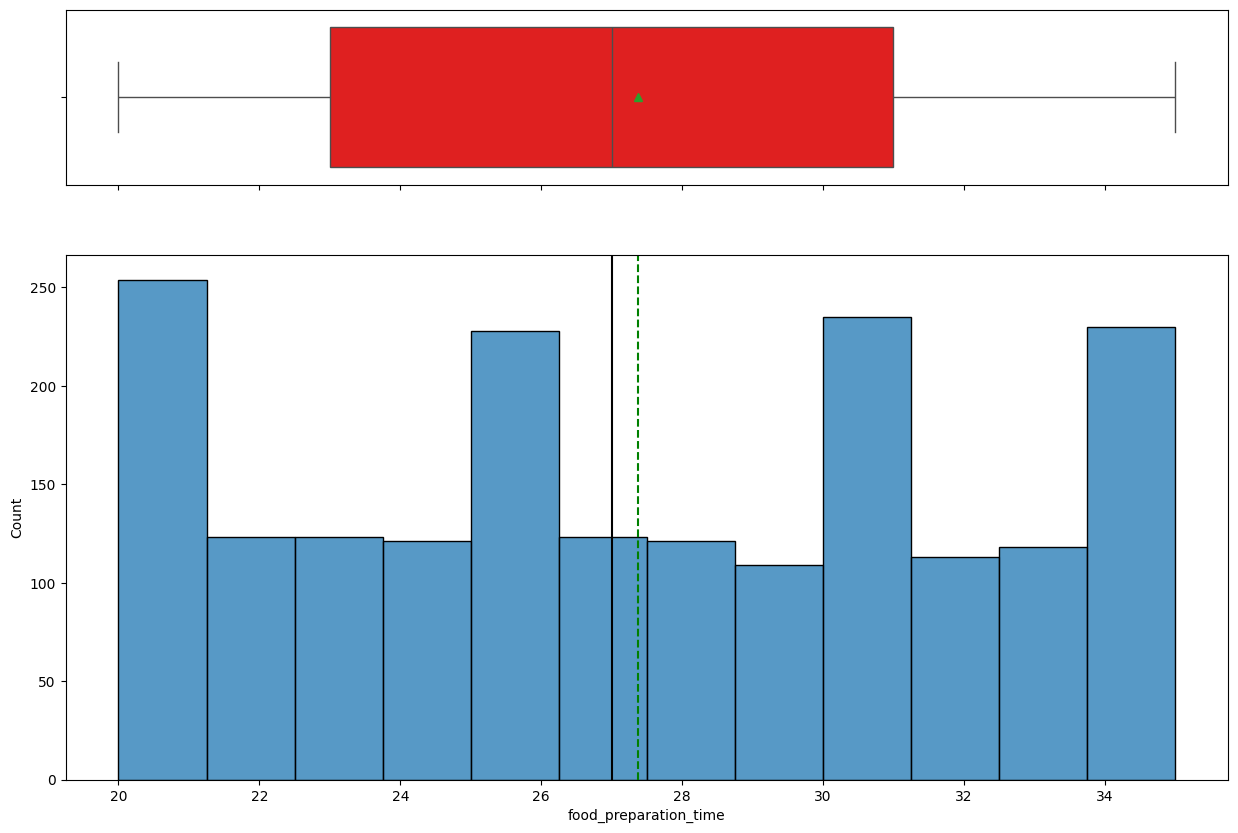

In [ ]:
histogram_boxplot(df.food_preparation_time)


The boxplot and histogram for the food_preparation_time displays an average food preparation time of 27, it take the food to be prepared 23 - 31 for 2/3rds of the time, a minimum prep time of 20 and a maximum food preparation time of 35. Both graphs are relatively symetrical but have a slight skew to the right.

# **Observations on Delivery Time**

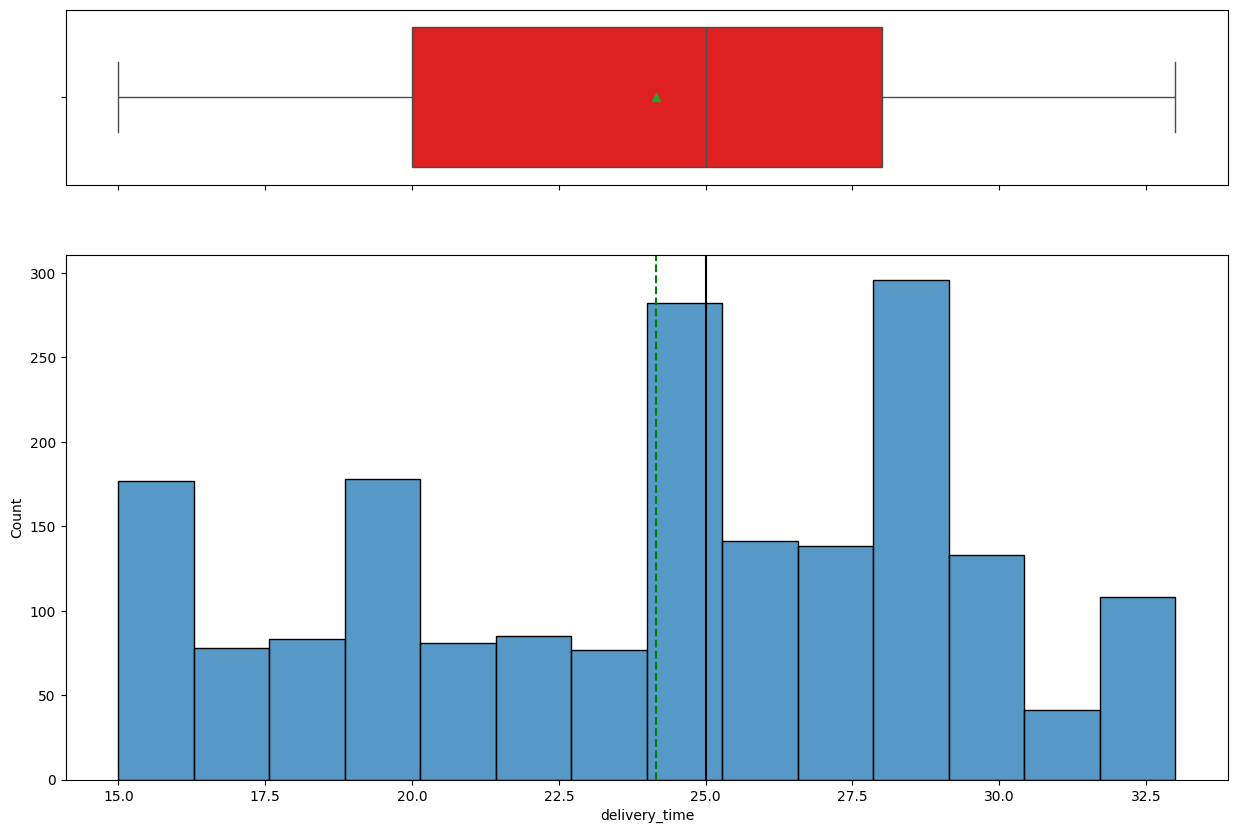

In [15]:
histogram_boxplot(df.delivery_time)


The boxplot and histogram for the delivery_time displays an average delivery time of 24, that the delivery time ranges between 20 to 28 for 2/3rds of the orders, a minimum delivery time of 15 and a maximum delivery time of 33. Both graphs are slightly left skewed.

## **Observations on Restaurant Name**

In [16]:
def bar_perc(data, z):
    total = len(data[z]) # Length of the column
    plt.figure(figsize = (15, 5))

    # Convert the column to a categorical data type
    data[z] = data[z].astype('category')

    ax = sns.countplot(x=z, data=data, palette='Paired', order=data[z].value_counts().index)

    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height() / total) # Percentage of each class
        x = p.get_x() + p.get_width() / 2 - 0.05                    # Width of the plot
        y = p.get_y() + p.get_height()                              # Height of the plot
        ax.annotate(percentage, (x, y), size = 12)                  # Annotate the percentage
        plt.xticks(rotation=45)                                     # Rotate the X labels 45 degrees
    plt.show()                                                      # Display the plot

<ipython-input-16-21f49cdd78f8>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=z, data=data, palette='Paired', order=data[z].value_counts().index)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 142 (\x8e) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 140 (\x8c) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


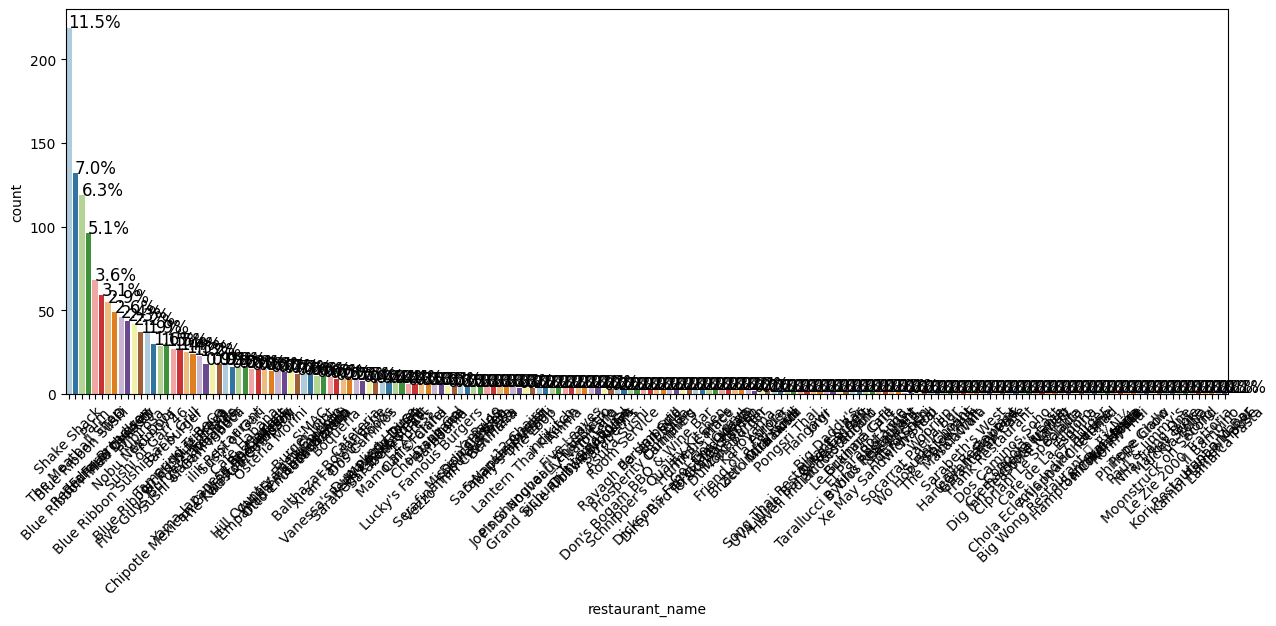

In [19]:
bar_perc(df, 'restaurant_name')

- 178 restaurant names are listed
- The top restaurant Shake Shack at a frequency of 219 at 11.5%

# **Observations of Cuisine Type**



<ipython-input-52-c060b68da690>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=z, data=data, palette='Paired', order=data[z].value_counts().index)


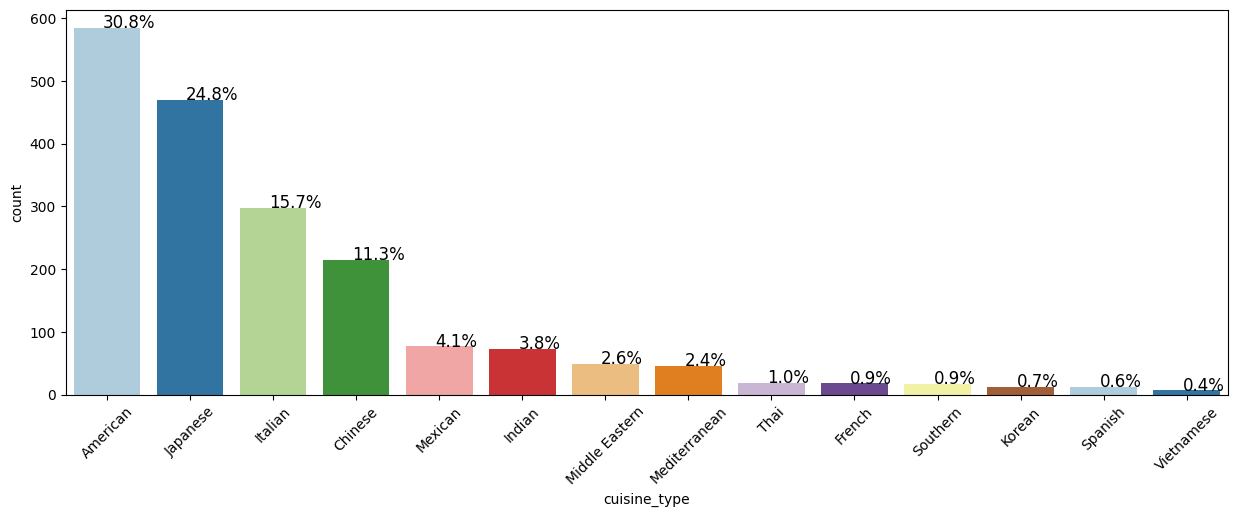

In [ ]:
bar_perc(df, 'cuisine_type')

- 14 different cuisine types are listed.
- American cuisine is at the far left being the highest frequency at 30.8%.
- Vietnamese cuisine is at the far right with the lowest frequency at 0.4%.

In [ ]:
def bar_perc(data, z):
    total = len(data[z]) # Length of the column
    plt.figure(figsize = (15, 5))

    # Convert the column to a categorical data type
    data[z] = data[z].astype('category')

    ax = sns.countplot(x=z, data=data, palette='Paired', order=data[z].value_counts().index)

    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height() / total) # Percentage of each class
        x = p.get_x() + p.get_width() / 2 - 0.05                    # Width of the plot
        y = p.get_y() + p.get_height()                              # Height of the plot
        ax.annotate(percentage, (x, y), size = 12)                  # Annotate the percentage

    plt.show()                                                      # Display the plot

# **Observations of Day of the Week**

<ipython-input-16-21f49cdd78f8>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=z, data=data, palette='Paired', order=data[z].value_counts().index)


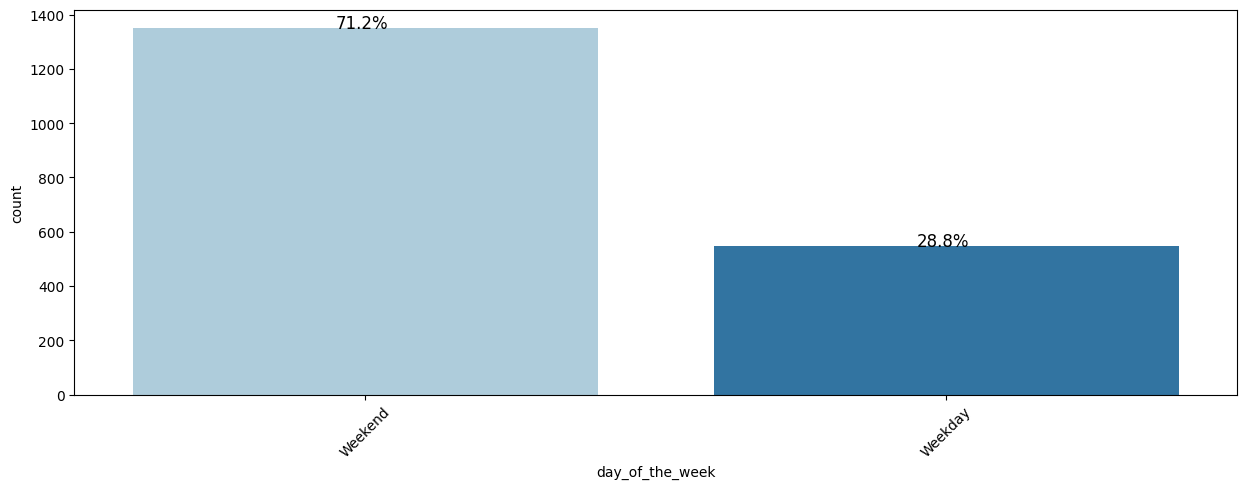

In [23]:
bar_perc(df, 'day_of_the_week')

- Weekend orders far out number weekday orders accounting for 71.2% of total orders.

# **Observations of Rating**

<ipython-input-80-c060b68da690>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=z, data=data, palette='Paired', order=data[z].value_counts().index)


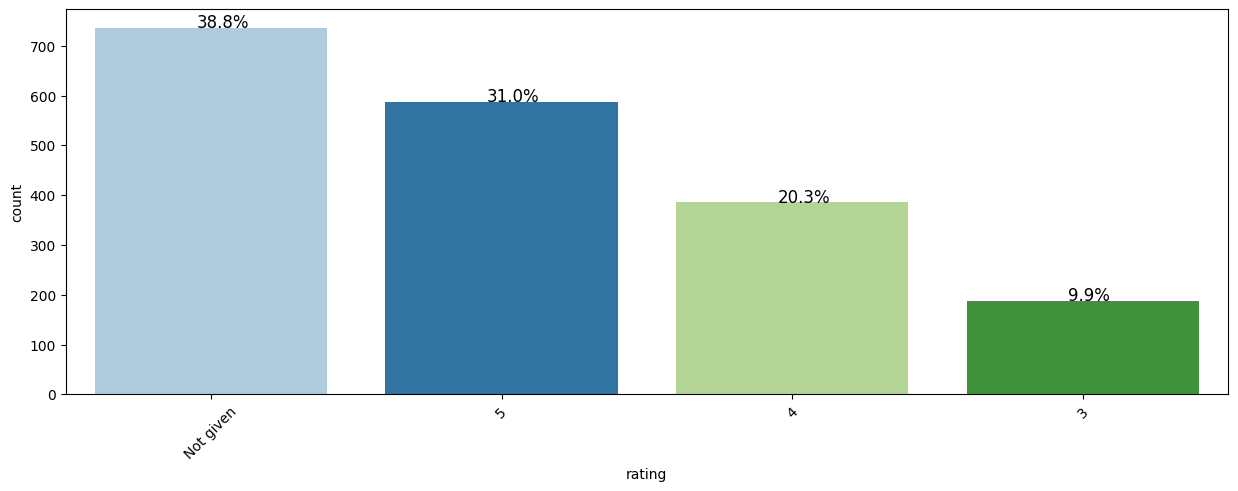

In [ ]:
bar_perc(df, 'rating')

- Most orders go unrated accounting for 38.8% of all orders followed by a rating of 5 at 31%.

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [ ]:
# Grouping by restaurant_name and counting the number of orders for each restaurant
restaurant_order_counts = df['restaurant_name'].value_counts().head(5)
restaurant_order_counts


Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: restaurant_name, dtype: int64

#### Observations:
- The top five restaurants in terms of the numbers of orders received are as follows from most orders to least: Shake Shack, The Meatball Shop, Blue Ribbon Sushi, Blue Ribbon Fried Chicken, and Parm.


### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [ ]:
# Filtering the DataFrame for orders made on weekends and counting the occurrences of each cuisine type
weekend_orders = df[df['day_of_the_week'] == 'Weekend']
popular_cuisine_on_weekends = weekend_orders['cuisine_type'].value_counts().head(1)
popular_cuisine_on_weekends


American    415
Name: cuisine_type, dtype: int64

#### Observations:
- American cuisine is most popular on weekends with a total of 415 orders.


### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [ ]:
# Calculating the percentage of orders that cost more than $20
total_orders = df.shape[0]
orders_above_20 = df[df['cost_of_the_order'] > 20].shape[0]
percentage_above_20 = (orders_above_20 / total_orders) * 100
percentage_above_20


29.24130663856691

#### Observations:
- Approximately 29% of the orders cost more than 20 dollars.


### **Question 10**: What is the mean order delivery time? [1 mark]

In [ ]:
# Calculating the mean delivery time
mean_delivery_time = df['delivery_time'].mean()
mean_delivery_time


24.161749209694417

#### Observations:
- The mean order delivery time is 24 minutes.

### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [ ]:
# Identifying the top 3 most frequent customers and the number of orders they placed
top_customers = df['customer_id'].value_counts().head(3)
top_customers


52832    13
47440    10
83287     9
Name: customer_id, dtype: int64

#### Observations:
- The top 3 most frequent customers are Customer ID 52832 with 13 orders, Customer ID 47440 with 10 orders, and Customer ID 83287 with 9 orders.

### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


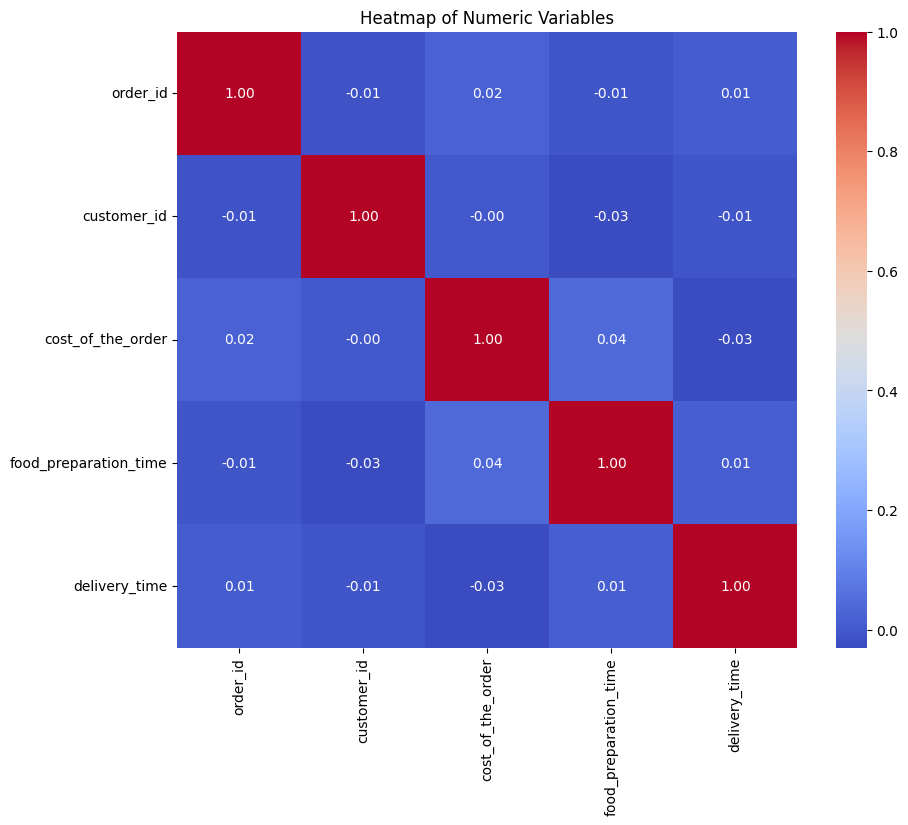

In [ ]:
# Since heatmap requires numerical data, we will only include numeric columns
# We'll also check for any non-numeric columns that need to be converted or excluded
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Creating a heatmap for the numeric variables
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap of Numeric Variables')
plt.show()


**Observations**
- Generating a heatmap to display any positively or negatively correlated numerical variables failed to yeild any indications of a correlation between numerical variables.
- Deciding that the variable 'Rating' would be more informative if it was numerical, I decided to take an a mean of the recorded ratings and substitute the calculated mean for the 'Not given' entry. I then converted the variable from an object to a float.

In [ ]:
# Filter out entries where rating is 'Not given'
df_filtered = df[df['rating'] != 'Not given']

# Convert 'rating' to numeric for calculating mean
df_filtered['rating'] = pd.to_numeric(df_filtered['rating'])



In [ ]:

# Counting the number of occurrences for each rating value
rating_counts = df_filtered['rating'].value_counts()

rating_counts


5    588
4    386
3    188
Name: rating, dtype: int64

In [ ]:
# Calculate the mean of the existing numeric ratings
mean_rating = df_filtered['rating'].mean()

# Replace 'Not given' in the original dataframe with the mean rating
df['rating'].replace('Not given', mean_rating, inplace=True)

# Displaying the first few rows to confirm the replacement
df.head()



,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,4.344234,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,4.344234,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


In [ ]:
# Checking to see if the data type for the data frame has been successfully converted
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   order_id               1898 non-null   int64   
 1   customer_id            1898 non-null   int64   
 2   restaurant_name        1898 non-null   object  
 3   cuisine_type           1898 non-null   object  
 4   cost_of_the_order      1898 non-null   float64 
 5   day_of_the_week        1898 non-null   object  
 6   rating                 1898 non-null   category
 7   food_preparation_time  1898 non-null   int64   
 8   delivery_time          1898 non-null   int64   
dtypes: category(1), float64(1), int64(4), object(3)
memory usage: 120.8+ KB


In [ ]:
# Converting the 'rating' column to numeric
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')

# Checking the data types of the columns again
df.dtypes


order_id                   int64
customer_id                int64
restaurant_name           object
cuisine_type              object
cost_of_the_order        float64
day_of_the_week           object
rating                   float64
food_preparation_time      int64
delivery_time              int64
dtype: object

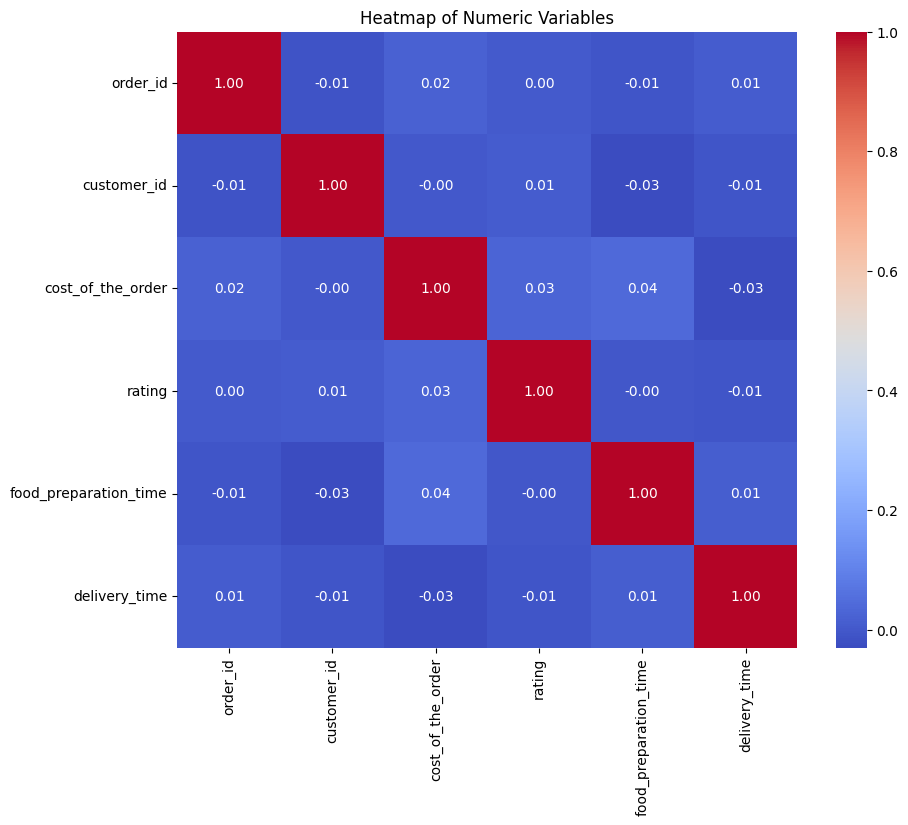

In [ ]:
# I will recalculate and redraw the heatmap with the order ratings converted to numerical data.
# rechecking for any non-numeric columns that need to be converted or excluded
numeric2_df = df.select_dtypes(include=['float64', 'int64'])

# Creating a heatmap for the numeric variables
plt.figure(figsize=(10, 8))
sns.heatmap(numeric2_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap of Numeric Variables')
plt.show()

 Observations:
 - Surprisingly after converting the order ratings to numerical values and replotting the heatmap, there is only a neglible .04 positive correlation between Food Preparation Time and Cost of the Order along with a neglible positive correlation between Rating and Cost of the Order.

In [ ]:
## Observations: - Surprisingly after converting the order ratings to numerical values and replotting the heatmap, there is only a neglible .04 positive correlation between Food Preparation Time and Cost of the Order along with a neglible positive correlation between Rating and Cost of the Order.


### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [ ]:
# Grouping the dataframe by restaurant_name and calculating the count and mean of ratings for each restaurant
restaurant_ratings = df.groupby('restaurant_name')['rating'].agg(['count', 'mean'])

# Filtering out restaurants with a rating count of more than 50 and an average rating greater than 4
eligible_restaurants = restaurant_ratings[(restaurant_ratings['count'] > 50) & (restaurant_ratings['mean'] > 4)]

eligible_restaurants


,count,mean
restaurant_name,,
Blue Ribbon Fried Chicken,96,4.333495
Blue Ribbon Sushi,119,4.267519
Parm,68,4.220335
RedFarm Broadway,59,4.274512
RedFarm Hudson,55,4.240526
Shake Shack,219,4.304128
The Meatball Shop,132,4.450934


#### Observations:
The following restaurants meet the criteria for the promotional offer, having more than 50 ratings and an average rating greater than 4:

**Blue Ribbon Fried Chicken**
Number of Ratings: 96
Average Rating: 4.33

**Blue Ribbon Sushi**
Number of Ratings: 119
Average Rating: 4.27

**Parm**
Number of Ratings: 68
Average Rating: 4.22

**RedFarm Broadway**
Number of Ratings: 59
Average Rating: 4.27

**RedFarm Hudson**
Number of Ratings: 55
Average Rating: 4.24

**Shake Shack**
Number of Ratings: 219
Average Rating: 4.30

**The Meatball Shop**
Number of Ratings: 132
Average Rating: 4.45

These restaurants are eligible for the promotional offer based on their rating count and average rating.


### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [ ]:
# Calculating the revenue for each order based on the cost and the company's charging policy
# 25% on orders greater than $20, 15% on orders greater than $5
df['revenue'] = df.apply(lambda x: x['cost_of_the_order'] * 0.25 if x['cost_of_the_order'] > 20 else (x['cost_of_the_order'] * 0.15 if x['cost_of_the_order'] > 5 else 0), axis=1)

# Calculating the total net revenue generated by the company across all orders
total_revenue = df['revenue'].sum()

total_revenue


6166.303

# **Observations**
The net revenue generated by the company across all orders is approximately $6166.30. This revenue is calculated based on the company's charging policy of 25% on orders with a cost greater than $20 and %15 on orders with a cost greater than $5.


### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [ ]:
# Calculating the total time for each order (food preparation time + delivery time)
df['total_delivery_time'] = df['food_preparation_time'] + df['delivery_time']

# Calculating the number of orders that take more than 60 minutes
orders_over_60_minutes = df[df['total_delivery_time'] > 60].shape[0]

# Calculating the total number of orders
total_orders = df.shape[0]

# Calculating the percentage of orders that take more than 60 minutes
percentage_over_60_minutes = (orders_over_60_minutes / total_orders) * 100

percentage_over_60_minutes


10.537407797681771

#### Observations:
Approximately 10.54% of the orders take more than 60 minutes to get delivered from the time the order is placed, considering both food preparation and delivery times.

### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [ ]:
# Calculating the mean delivery time for weekdays and weekends
mean_delivery_weekdays = df[df['day_of_the_week'] == 'Weekday']['delivery_time'].mean()
mean_delivery_weekends = df[df['day_of_the_week'] == 'Weekend']['delivery_time'].mean()

mean_delivery_weekdays, mean_delivery_weekends


(28.340036563071298, 22.4700222057735)

#### Observations:
The mean delivery time of orders varies between weekdays and weekends:

- On weekdays, the mean delivery time is approximately 28.34 minutes.

- On weekends, the mean delivery time is shorter, at about 22.47 minutes.

This indicates that, on average, orders are delivered faster on weekends compared to weekdays.

### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:

**Promotional Offers and High-Performing Restaurants**:

The identification of restaurants with a high count of ratings and an average rating above 4 indicates customer satisfaction.

Recommendation: Continue to leverage these high-performing restaurants in promotional campaigns to attract more customers. Consider partnership opportunities for exclusive deals.

**Revenue Model Efficiency:**

The company's revenue model of charging a percentage on orders above certain amounts seems to be effective.

Recommendation: Analyze the price sensitivity of customers to optimize the pricing strategy further. A tiered commission model might be more profitable.

**Delivery Time Analysis:**

The finding that approximately 10.54% of orders take over 60 minutes to deliver highlights a potential area for improvement.
Weekends show a faster delivery time compared to weekdays.

Recommendation: Investigate the factors causing longer delivery times, especially on weekdays. Consider strategies like optimizing delivery routes or partnering with more delivery personnel to reduce delivery times.

**Customer Experience and Rating Analysis:**

A significant number of orders had 'Not given' ratings. This data could be crucial for understanding customer satisfaction but is currently missing.

Recommendation: Encourage customers to rate their experience to gather more comprehensive feedback. This can be achieved through incentives for rating submissions.

**Marketing and Customer Engagement:**

The popularity of certain cuisines and restaurants could be utilized in targeted marketing campaigns.

Recommendation: Use data-driven insights to create personalized marketing strategies. Highlight popular dishes or restaurants in promotions.



### Recommendations:
**Operational Insights:**

The dataset provides valuable insights into customer preferences and behavior.

Recommendation: Use these insights to inform menu selections, offer time-bound discounts, and optimize operational hours, especially focusing on peak order times.

By focusing on these areas, the company can enhance operational efficiency, improve customer satisfaction, and potentially increase revenue. Each recommendation aims to leverage data-driven insights for strategic decision-making.

---